In [63]:
import pandas as pd

In [64]:
df = pd.read_csv('transactions.csv')

In [65]:
df.head()

,t_date,cust_id,t_amt,services,products_used,city,state,t_details
0,06-26-2015,4007024,40.33,Exercise & Fitness,Cardio Machine Accessories,Clarksville,Tennessee,credit
1,05-26-2015,4006742,198.44,Exercise & Fitness,Weightlifting Gloves,Long Beach,California,credit
2,06-01-2015,4009775,5.58,Exercise & Fitness,Weightlifting Machine Accessories,Anaheim,California,credit
3,06-05-2015,4002199,198.19,Gymnastics,Gymnastics Rings,Milwaukee,Wisconsin,credit
4,12-17-2015,4002613,98.81,Team Sports,Field Hockey,Nashville,Tennessee,credit


In [66]:
#1 total sales accross all transactions
df['t_amt'] = pd.to_numeric(df['t_amt'],errors='coerce')
trcs_sum = df['t_amt'].sum()
trcs_sum

np.float64(5110820.54)

In [67]:
#2 highest transactions among all months
df['t_date'] = pd.to_datetime(df['t_date'],errors='coerce')
df['month'] = df['t_date'].dt.month
x= df.groupby('month')['t_amt'].sum().reset_index()
x[x['t_amt']==x['t_amt'].max()]

,month,t_amt
2,3,444664.24


In [68]:
#3 average amount spent per customer
df.groupby('cust_id')['t_amt'].mean()

cust_id
4000000    127.444000
4000001    108.945556
4000002     56.165000
4000003    123.670000
4000004    168.135000
              ...    
4009995     65.018571
4009996    104.515000
4009997    121.547500
4009998    110.950000
4009999     85.252500
Name: t_amt, Length: 9926, dtype: float64

<Axes: >

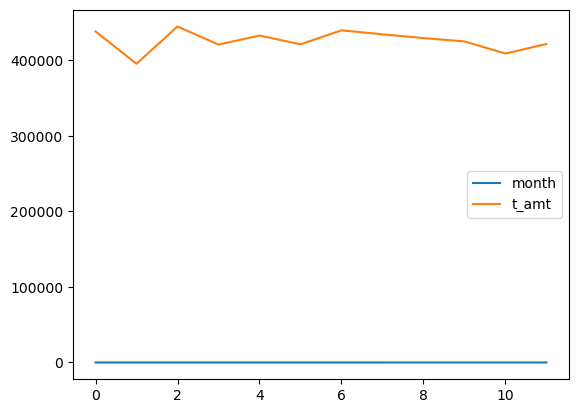

In [69]:
#4 trend of total sales
x.plot()

In [70]:
#5 highest single trcs
print(df['t_amt'].max())

200.0


In [71]:
#6 highest service contribution
x = df.groupby('services')['t_amt'].sum().reset_index()
x.max()

services    Winter Sports
t_amt           846678.64
dtype: object

In [72]:
#7 highest revenue generated product
x = df.groupby('products_used')['t_amt'].sum().reset_index()
x.max()

products_used    Yoga & Pilates
t_amt                  47804.94
dtype: object

In [73]:
#8 How does the average transaction amount vary between services?
df.groupby('services')['t_amt'].mean().sort_values(ascending=False).reset_index()

,services,t_amt
0,Exercise & Fitness,103.660247
1,Racquet Sports,103.647461
2,Air Sports,103.455104
3,Indoor Games,103.074684
4,Dancing,102.907512
5,Team Sports,102.738998
6,Gymnastics,102.385901
7,Games,102.272968
8,Jumping,102.155171
9,Water Sports,101.899975


In [74]:
#9 How many unique customers made purchases?
df['cust_id'].nunique()

9926

In [75]:
#10 Which customers have spent the most overall?
df.groupby('cust_id')['t_amt'].sum().sort_values(ascending=False).reset_index().head()

,cust_id,t_amt
0,4009485,1973.30
1,4006425,1732.09
2,4000221,1671.47
3,4003228,1640.63
4,4006606,1628.94


In [76]:
#11 what is the average number of transactions per customer?
df.groupby('cust_id')['t_amt'].count().mean()

np.float64(5.037275841225066)

In [77]:
#12 Are there customers who made multiple purchases in different categories?
custpurchases = df.groupby('cust_id')['services'].nunique().reset_index()
custpurchases[custpurchases>1].head()

,cust_id,services
0,4000000,4.0
1,4000001,8.0
2,4000002,2.0
3,4000003,3.0
4,4000004,3.0


In [78]:
#13 What percentage of customers are repeat buyers?
custpurchases = df.groupby('cust_id')['products_used'].nunique().reset_index()
custpurchases[custpurchases['products_used']>2]

,cust_id,products_used
0,4000000,5
1,4000001,9
3,4000003,3
4,4000004,4
5,4000005,8
...,...,...
9921,4009995,7
9922,4009996,8
9923,4009997,4
9924,4009998,6


In [79]:
#14 Which product category has the highest total sales?
g = df.groupby('services')['t_amt'].agg(['sum','count']).reset_index()
g[g['sum']==g['sum'].max()]

,services,sum,count
9,Outdoor Recreation,846678.64,8383


In [80]:
#15 Which services are most popular by transaction count?
g[g['count']==g['count'].max()]

,services,sum,count
9,Outdoor Recreation,846678.64,8383


In [81]:
#16 For each service, which product type is purchased most frequently?
x = df.groupby(['services','products_used']).size().reset_index(name='freq')
x.loc[x.groupby('services')['freq'].idxmax()]

,services,products_used,freq
2,Air Sports,Parachutes,400
3,Combat Sports,Boxing,431
7,Dancing,Ballet Bars,414
9,Exercise & Fitness,Cardio Machine Accessories,445
32,Games,Mahjong,437
35,Gymnastics,Balance Beams,425
47,Indoor Games,Foosball,422
54,Jumping,Trampolines,421
60,Outdoor Play Equipment,Swing Sets,464
73,Outdoor Recreation,Lawn Games,466


In [82]:
#17 What is the average transaction amount per product type?
df.groupby('products_used')['t_amt'].mean().reset_index()

,products_used,t_amt
0,Abdominal Equipment,105.362798
1,Air Hockey,103.775478
2,Air Suits,101.421832
3,Archery,97.345564
4,Badminton,108.441138
...,...,...
120,Wetsuits,102.042775
121,Whitewater Rafting,102.877744
122,Windsurfing,104.161453
123,Wrestling,97.895364


In [83]:
#18 Are there specific services where customers spend significantly more?
df.groupby('services')['t_amt'].mean().sort_values(ascending=False).reset_index()

,services,t_amt
0,Exercise & Fitness,103.660247
1,Racquet Sports,103.647461
2,Air Sports,103.455104
3,Indoor Games,103.074684
4,Dancing,102.907512
5,Team Sports,102.738998
6,Gymnastics,102.385901
7,Games,102.272968
8,Jumping,102.155171
9,Water Sports,101.899975


In [84]:
#19 Which state has the highest total sales?
df.groupby('state')['t_amt'].sum().idxmax()

'California'

In [123]:
#20 Which city records the highest number of transactions?
df.groupby('city').size().idxmax()

'Pasadena'

In [86]:
#21 What is the average spending per transaction in each state?
df.groupby('state')['t_amt'].mean().reset_index().head()

,state,t_amt
0,Alabama,102.487049
1,Arizona,102.172241
2,California,102.652182
3,Colorado,101.537415
4,Connecticut,99.982108


In [87]:
#22 Are certain services more popular in specific states?
df.groupby(['state','services']).size().reset_index(name='count').sort_values(['state','count'], ascending=[True, False])

,state,services,count
9,Alabama,Outdoor Recreation,191
3,Alabama,Exercise & Fitness,160
12,Alabama,Team Sports,131
13,Alabama,Water Sports,124
4,Alabama,Games,80
...,...,...,...
562,Wisconsin,Jumping,40
566,Wisconsin,Racquet Sports,34
555,Wisconsin,Air Sports,20
565,Wisconsin,Puzzles,15


In [88]:
#23 Which states buy the most Outdoor Recreation products?
df[df['services'] == 'Outdoor Recreation'].groupby('state')['t_amt'].sum().sort_values(ascending=False).reset_index().head()

,state,t_amt
0,California,120605.09
1,Texas,81616.93
2,Florida,47959.38
3,Oregon,32892.83
4,Tennessee,31080.93


In [89]:
#24 Compare average spending between California and Texas customers.
df[df['state'].isin(['California','Texas'])].groupby('state')['t_amt'].mean().reset_index()

,state,t_amt
0,California,102.652182
1,Texas,101.379891


In [94]:
#25 Which quarter of the year saw the highest sales?
x = df.groupby(df['t_date'].dt.to_period('Q'))['t_amt'].sum().reset_index()
x[x['t_amt']== x['t_amt'].max()]

,t_date,t_amt
2,2015Q3,1303137.44


In [97]:
#26 How does total sales vary month by month?
df.groupby(df['t_date'].dt.to_period('M'))['t_amt'].sum().reset_index().head()

,t_date,t_amt
0,2015-01,438165.76
1,2015-02,395262.37
2,2015-03,444664.24
3,2015-04,420695.24
4,2015-05,432627.58


In [100]:
#27 What is the total number of transactions per month?
df.groupby(df['t_date'].dt.to_period('M')).size().reset_index().head()

,t_date,0
0,2015-01,4268
1,2015-02,3834
2,2015-03,4360
3,2015-04,4175
4,2015-05,4205


In [102]:
#28 Is there a particular season when sports equipment sales spike?
df.groupby(df['t_date'].dt.month)['t_amt'].sum().sort_values(ascending=False).reset_index().head()

,t_date,t_amt
0,3,444664.24
1,7,439560.80
2,1,438165.76
3,8,434255.01
4,5,432627.58


In [122]:
#29 How many transactions were done using credit?
x = df[df['t_details'] == 'credit']
x['t_details'].count()

np.int64(43151)

In [110]:
#30 What is the total revenue generated from credit transactions?
df[df['t_details'] == 'credit']['t_amt'].sum()

np.float64(4923134.93)

In [112]:
#31 Is there a difference in average spending between credit and debit customers?
df.groupby('t_details')['t_amt'].mean().reset_index()

,t_details,t_amt
0,cash,27.403360
1,credit,114.090865


In [114]:
#32 Which states or cities should the company focus on for marketing high-value products?
df.groupby(['state','city'])['t_amt'].mean().sort_values(ascending=False).reset_index().head()

,state,city,t_amt
0,California,Long Beach,109.308506
1,Massachusetts,Boston,107.975107
2,Kentucky,Louisville,106.643184
3,New Jersey,Paterson,106.629200
4,California,Irvine,106.517384


In [115]:
#33 Should more inventory be stocked for Exercise & Fitness products given their popularity?
df[df['services'] == 'Exercise & Fitness'].shape[0]

7394

In [118]:
#34 Are there product categories with high sales but low average transaction amounts?
g = df.groupby('services')['t_amt'].agg(['sum','mean'])
g.sort_values('sum', ascending=False).reset_index().head()

,services,sum,mean
0,Outdoor Recreation,846678.64,100.999480
1,Exercise & Fitness,766463.87,103.660247
2,Team Sports,617461.38,102.738998
3,Water Sports,531815.97,101.899975
4,Games,374932.70,102.272968


In [120]:
#35 Are there underperforming service categories that need promotional offers?
df.groupby('services')['t_amt'].sum().sort_values().reset_index().head()

,services,t_amt
0,Dancing,42603.71
1,Puzzles,61564.75
2,Air Sports,99316.90
3,Combat Sports,164730.67
4,Racquet Sports,166976.06
